In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/merged_APPA_data.csv', encoding='windows-1252')

        Data     Valore
0    2012-01  31.359650
1    2012-02  35.384362
2    2012-03  32.708612
3    2012-04  25.925557
4    2012-05  28.295275
..       ...        ...
122  2022-03  35.355791
123  2022-04  27.224740
124  2022-05  27.324037
125  2022-06  30.083651
126  2022-07  30.989408

[127 rows x 2 columns]


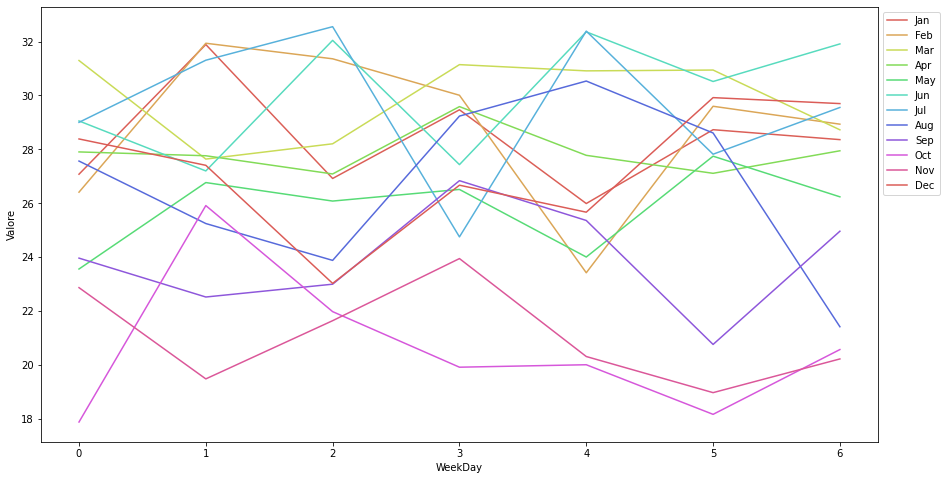

In [4]:
#Plot Weekly  3rd Section
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)

# df_year_avg = df.groupby(pd.PeriodIndex(df['Data'], freq="M"))['Valore'].mean()
# df_year_avg = df_year_avg.reset_index()
df_year_avg = df.groupby([df.Data.dt.month, df.Data.dt.day_of_week]).mean()
df_year_avg.index.names = ["Month", "WeekDay"]
print(df_year_avg)
df_year_avg = df_year_avg.reset_index()
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="WeekDay", hue= "Month", palette= 'hls',data=df_year_avg)
plt.legend(bbox_to_anchor=(1,1), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])